# <ins>Breast Cancer Wisconsin (Diagnostic) Data Set</ins>

**Data Set Characteristics:**

Multivariate | Number of Instances: 569 | Area: Life | Attribute Characteristics: Real |
Number of Attributes: 32 | Date Donated: 1995-11-01 | 
Associated Tasks: Classification | Missing Values: No 

**Data Set Information:** Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

**Attribute Information:**

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32) Ten real-valued features are computed for each cell nucleus:
   
    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

In [1]:
# input reading
setwd("C:/IE582")
Dataset_1<-read.delim("wdbc.txt",sep = ",", dec = ".",header = FALSE)
Dataset_1$V2 = as.factor(Dataset_1$V2)
head(Dataset_1)
str(Dataset_1)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


'data.frame':	569 obs. of  32 variables:
 $ V1 : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ V2 : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ V3 : num  18 20.6 19.7 11.4 20.3 ...
 $ V4 : num  10.4 17.8 21.2 20.4 14.3 ...
 $ V5 : num  122.8 132.9 130 77.6 135.1 ...
 $ V6 : num  1001 1326 1203 386 1297 ...
 $ V7 : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ V8 : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ V9 : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ V10: num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ V11: num  0.242 0.181 0.207 0.26 0.181 ...
 $ V12: num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ V13: num  1.095 0.543 0.746 0.496 0.757 ...
 $ V14: num  0.905 0.734 0.787 1.156 0.781 ...
 $ V15: num  8.59 3.4 4.58 3.44 5.44 ...
 $ V16: num  153.4 74.1 94 27.2 94.4 ...
 $ V17: num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
 $ V18: num  0.049 0.0131 0.0401 0.0746 0.0246 ...
 $ V19: num  0.0537 0.0186 0.0383 0.0566 0.0569 .

In [2]:
# column V1 gives the ID number, I will drop this column since it is unnecessary.
Dataset_1<-Dataset_1[,-1] 

# random splitting of data to train and test
v <- as.vector(c(rep(TRUE,369),rep(FALSE,200)))
ind <- sample(v) 
Dataset_1_train <- Dataset_1[ind, ] 
Dataset_1_test <- Dataset_1[!ind, ] 

## Penalized Regression

In the penalized regression approach, cross validation is used on the train data to find the best value of the lambda and it is found after 10 fold cross validation. Then with this lambda a model is built to predict diagnosis class of the test data instances.

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.1


[1] "min lambda: "      "0.004775321257161"


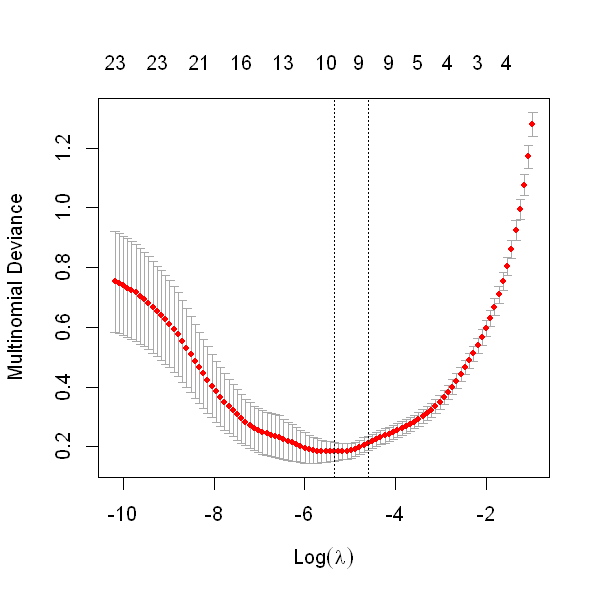

In [3]:
library(glmnet)
new_train<-as.matrix(Dataset_1_train[,-1])
new_test<-as.matrix(Dataset_1_test[,-1])
cross_validation<-cv.glmnet(new_train,as.matrix(Dataset_1_train$V2) ,family="multinomial", alpha=1)
options(repr.plot.width=5, repr.plot.height=5)
print(c("min lambda: ",cross_validation$lambda.min))
plot(cross_validation)

In [5]:
print(c("min lambda: ",cross_validation$lambda.min))

[1] "min lambda: "      "0.004775321257161"


In [4]:
# fitting the penalized regression model
fit <- glmnet(new_train,as.matrix(Dataset_1_train$V2) ,family="multinomial", alpha=1,lambda=cross_validation$lambda.min)
# summarize the model
summary(fit)

           Length Class  Mode     
a0         2      -none- numeric  
beta       2      -none- list     
dfmat      2      -none- numeric  
df         1      -none- numeric  
dim        2      -none- numeric  
lambda     1      -none- numeric  
dev.ratio  1      -none- numeric  
nulldev    1      -none- numeric  
npasses    1      -none- numeric  
jerr       1      -none- numeric  
offset     1      -none- logical  
classnames 2      -none- character
grouped    1      -none- logical  
call       6      -none- call     
nobs       1      -none- numeric  

In [6]:
# prediction for train data
predictions <- predict(fit, new_train, type="class")
# accuracy for train data
tab<-table(predictions[,1],Dataset_1_train$V2)
print("confusion matrix for the train data")
print(tab)

[1] "confusion matrix for the train data"
   
      B   M
  B 245   5
  M   0 119


In [7]:
train_error<-1-sum(diag(tab)/sum(tab))
print(c("train error",train_error))

[1] "train error"        "0.0135501355013551"


In [8]:
# prediction for test data
predictions <- predict(fit, new_test, type="class")
# accuracy for test data
tab<-table(predictions[,1],Dataset_1_test$V2)
print("confusion matrix for the test data")
print(tab)

[1] "confusion matrix for the test data"
   
      B   M
  B 111   6
  M   1  82


In [9]:
test_error<-1-sum(diag(tab)/sum(tab))
print(c("test error",test_error))

[1] "test error"         "0.0349999999999999"


<ins>Results</ins>:

- Confusion matrix and error rates are used as performance metrics. 
- Results show that train error is smaller than test error but for both train and test data, the model performs well since error rates are small.

## Decision Tree

In decision tree approach, for **the minimal number of observations per tree leaf** 2,3,4 and 5 are used; for **the complexity parameter** 0.005, 0.01, 0.015 and 0.02 are used.

In [10]:
library(rpart)
require(rpart.plot)

Warning message:
"package 'rpart' was built under R version 3.6.3"Loading required package: rpart.plot
Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

In [16]:
set.seed(168)

decision_tree <- function(i) {
    dtree1<-rpart(V2~.,data = Dataset_1_train,control = rpart.control(minbucket = 1+i,cp=0.005*i))
    a<-as.data.frame(printcp(dtree1))
    par(cex = .55)
    rpart.plot(dtree1,extra = 2,compress=TRUE)
  
    # prediction
    predict(dtree1,Dataset_1_test)
    
    # misclassification error for train data
    tab1_train<-table(predict(dtree1,Dataset_1_train, type="class"),Dataset_1_train$V2)
    print(tab1_train)
    error1_train<-1-sum(diag(tab1_train)/sum(tab1_train))
    print(c("train error:",error1_train)) 
  
    # misclassification error for test data
    tab1_test<-table(predict(dtree1,Dataset_1_test, type="class"),Dataset_1_test$V2)
    error1_test<-1-sum(diag(tab1_test)/sum(tab1_test))
    print(c("test error:",error1_test))
    
    options(repr.plot.width=4, repr.plot.height=4)
    #print("cp values for error rates:")
    plotcp(dtree1)
    return(c(error1_train,error1_test))
}

In [17]:
train_err <- list()
test_err <- list()


Classification tree:
rpart(formula = V2 ~ ., data = Dataset_1_train, control = rpart.control(minbucket = 1 + 
    i, cp = 0.005 * i))

Variables actually used in tree construction:
[1] V23 V25 V3  V30 V32

Root node error: 124/369 = 0.33604

n= 369 

        CP nsplit rel error  xerror     xstd
1 0.822581      0  1.000000 1.00000 0.073174
2 0.072581      1  0.177419 0.22581 0.041022
3 0.020161      2  0.104839 0.15323 0.034235
4 0.016129      4  0.064516 0.16129 0.035075
5 0.005000      5  0.048387 0.13710 0.032476
   
      B   M
  B 242   3
  M   3 121
[1] "train error:"      "0.016260162601626"
[1] "test error:" "0.1"        


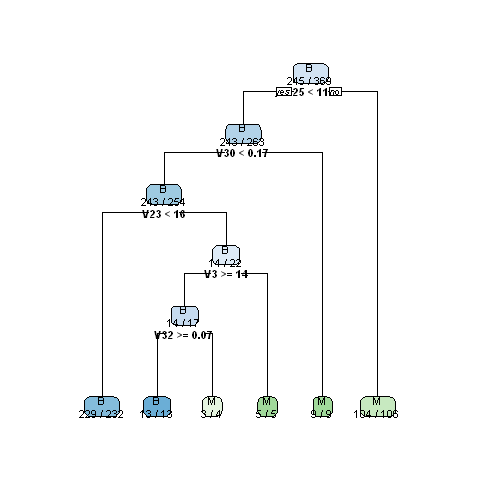

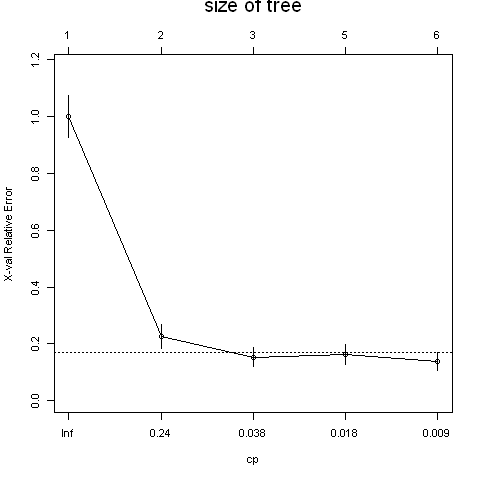

In [18]:
err = decision_tree(1)
train_err <- append(train_err,err[1])
test_err <- append(test_err,err[2])


Classification tree:
rpart(formula = V2 ~ ., data = Dataset_1_train, control = rpart.control(minbucket = 1 + 
    i, cp = 0.005 * i))

Variables actually used in tree construction:
[1] V23 V25 V3  V30 V32

Root node error: 124/369 = 0.33604

n= 369 

        CP nsplit rel error  xerror     xstd
1 0.822581      0  1.000000 1.00000 0.073174
2 0.072581      1  0.177419 0.29032 0.045966
3 0.020161      2  0.104839 0.20161 0.038933
4 0.016129      4  0.064516 0.18548 0.037451
5 0.010000      5  0.048387 0.16935 0.035889
   
      B   M
  B 242   3
  M   3 121
[1] "train error:"      "0.016260162601626"
[1] "test error:" "0.1"        


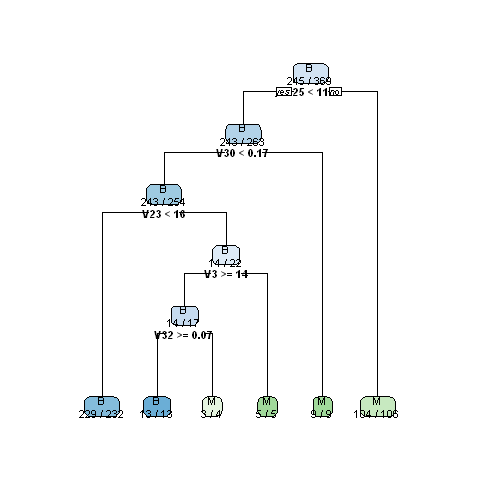

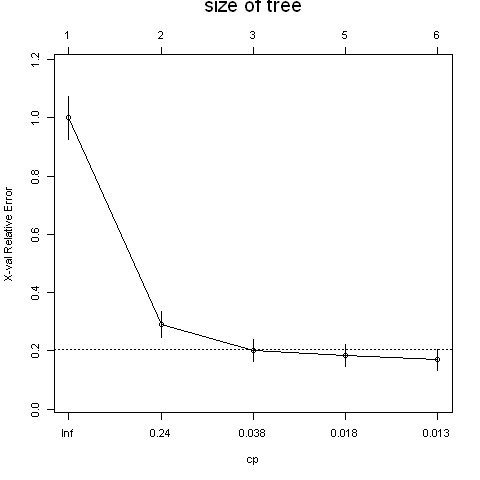

In [19]:
err = decision_tree(2)
train_err <- append(train_err,err[1])
test_err <- append(test_err,err[2])


Classification tree:
rpart(formula = V2 ~ ., data = Dataset_1_train, control = rpart.control(minbucket = 1 + 
    i, cp = 0.005 * i))

Variables actually used in tree construction:
[1] V23 V25 V3  V30 V32

Root node error: 124/369 = 0.33604

n= 369 

        CP nsplit rel error  xerror     xstd
1 0.822581      0  1.000000 1.00000 0.073174
2 0.072581      1  0.177419 0.22581 0.041022
3 0.020161      2  0.104839 0.15323 0.034235
4 0.016129      4  0.064516 0.15323 0.034235
5 0.015000      5  0.048387 0.14516 0.033370
   
      B   M
  B 242   3
  M   3 121
[1] "train error:"      "0.016260162601626"
[1] "test error:" "0.1"        


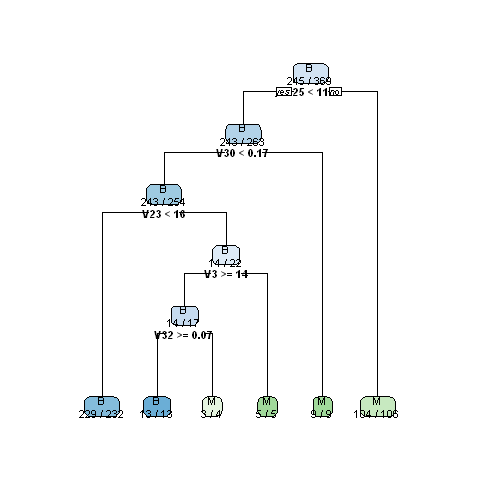

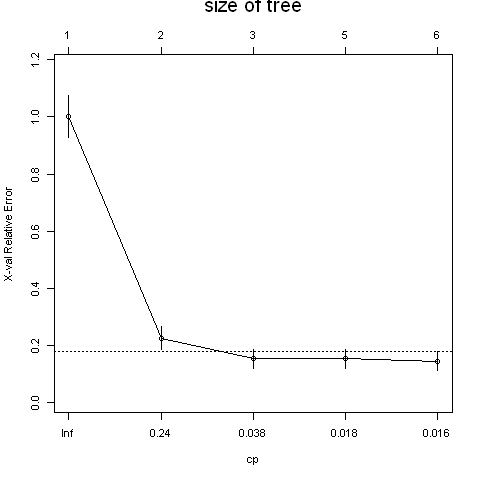

In [20]:
err = decision_tree(3)
train_err <- append(train_err,err[1])
test_err <- append(test_err,err[2])


Classification tree:
rpart(formula = V2 ~ ., data = Dataset_1_train, control = rpart.control(minbucket = 1 + 
    i, cp = 0.005 * i))

Variables actually used in tree construction:
[1] V23 V25 V3  V30

Root node error: 124/369 = 0.33604

n= 369 

        CP nsplit rel error  xerror     xstd
1 0.822581      0  1.000000 1.00000 0.073174
2 0.072581      1  0.177419 0.23387 0.041687
3 0.020161      2  0.104839 0.15323 0.034235
4 0.020000      4  0.064516 0.18548 0.037451
   
      B   M
  B 243   6
  M   2 118
[1] "train error:"       "0.0216802168021679"
[1] "test error:" "0.095"      


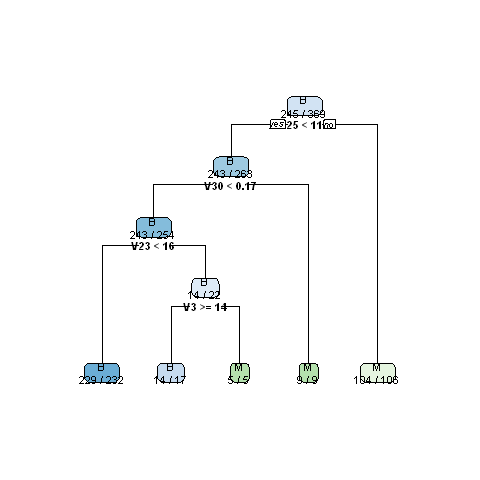

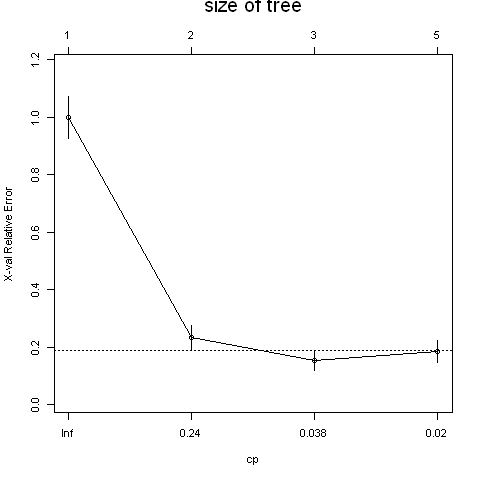

In [21]:
err = decision_tree(4)
train_err <- append(train_err,err[1])
test_err <- append(test_err,err[2])

In [22]:
train_err

[[1]]
[1] 0.01626016

[[2]]
[1] 0.01626016

[[3]]
[1] 0.01626016

[[4]]
[1] 0.02168022

In [24]:
test_err

[[1]]
[1] 0.1

[[2]]
[1] 0.1

[[3]]
[1] 0.1

[[4]]
[1] 0.095

- For both train and test data first three models give the same test and train error rates but for the test data, the last model which have **the minimal number of observations per tree leaf of 5** and **the complexity parameter of 0.02** performs better than others.

## Random Forest

In random forest approach, J trees are fit to bootstrap samples using a random sample of m features on which to split each
node. I used (12,14,16,18,20) as m in each iteration to find the best value.

In [25]:
require(randomForest)
library(cowplot)

Loading required package: randomForest
Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'cowplot' was built under R version 3.6.3"

In [29]:
set.seed(165)

random_forest <- function(i){
    model<-randomForest(V2~.,data=Dataset_1_train,proximity=TRUE,mtry=10+2*i)
    print(model)
    
    # misclassification error for train data
    tab1_train<-table(predict(model,Dataset_1_train, type="class"),Dataset_1_train$V2)
    print(tab1_train)
    error1_train<-1-sum(diag(tab1_train)/sum(tab1_train))
    print(c("train error:",error1_train)) 
  
    # misclassification error for test data
    tab1_test<-table(predict(model,Dataset_1_test, type="class"),Dataset_1_test$V2)
    error1_test<-1-sum(diag(tab1_test)/sum(tab1_test))
    print(c("test error:",error1_test))
    
    return(error1_test)
}

In [30]:
err <- list()

In [31]:
e = random_forest(1)
err = append(err,e)


Call:
 randomForest(formula = V2 ~ ., data = Dataset_1_train, proximity = TRUE,      mtry = 10 + 2 * i) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 12

        OOB estimate of  error rate: 3.79%
Confusion matrix:
    B   M class.error
B 241   4  0.01632653
M  10 114  0.08064516
   
      B   M
  B 245   0
  M   0 124
[1] "train error:" "0"           
[1] "test error:"        "0.0599999999999999"


In [32]:
e = random_forest(2)
err = append(err,e)


Call:
 randomForest(formula = V2 ~ ., data = Dataset_1_train, proximity = TRUE,      mtry = 10 + 2 * i) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 14

        OOB estimate of  error rate: 3.79%
Confusion matrix:
    B   M class.error
B 240   5  0.02040816
M   9 115  0.07258065
   
      B   M
  B 245   0
  M   0 124
[1] "train error:" "0"           
[1] "test error:" "0.07"       


In [33]:
e = random_forest(3)
err = append(err,e)


Call:
 randomForest(formula = V2 ~ ., data = Dataset_1_train, proximity = TRUE,      mtry = 10 + 2 * i) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 16

        OOB estimate of  error rate: 4.07%
Confusion matrix:
    B   M class.error
B 240   5  0.02040816
M  10 114  0.08064516
   
      B   M
  B 245   0
  M   0 124
[1] "train error:" "0"           
[1] "test error:"        "0.0649999999999999"


In [34]:
e = random_forest(4)
err = append(err,e)


Call:
 randomForest(formula = V2 ~ ., data = Dataset_1_train, proximity = TRUE,      mtry = 10 + 2 * i) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 18

        OOB estimate of  error rate: 4.07%
Confusion matrix:
    B   M class.error
B 239   6  0.02448980
M   9 115  0.07258065
   
      B   M
  B 245   0
  M   0 124
[1] "train error:" "0"           
[1] "test error:"        "0.0649999999999999"


In [35]:
e = random_forest(5)
err = append(err,e)


Call:
 randomForest(formula = V2 ~ ., data = Dataset_1_train, proximity = TRUE,      mtry = 10 + 2 * i) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 20

        OOB estimate of  error rate: 3.79%
Confusion matrix:
    B   M class.error
B 240   5  0.02040816
M   9 115  0.07258065
   
      B   M
  B 245   0
  M   0 124
[1] "train error:" "0"           
[1] "test error:"        "0.0649999999999999"


In [36]:
err

[[1]]
[1] 0.06

[[2]]
[1] 0.07

[[3]]
[1] 0.065

[[4]]
[1] 0.065

[[5]]
[1] 0.065

- Comparing the test error rates, the best model is found with m=12.

- With the best decision tree, test error is 0.095 and in this approach with the best model, test error is 0.059999. Thus, random forest performs better than decision tree for this data.

## Stochastic Gradient Boosting (SGB)

In this part, different values of depth, learning rate and the number of trees are tried. After all, the best values of these parameters are obtained from the cross validation. Note that, after the implementation of the procedure, the model gives the result in the probability format. After converting these probability data to the categorical results, the confusion matrices are created and the error rates are calculated these matrices.

In [37]:
library(caret)
require(gbm)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Loading required package: gbm
Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.8


Warning message:
"Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk."

,var,rel.inf
V25,V25,31.053939729
V30,V30,25.279631036
V10,V10,12.903393843
V16,V16,10.256716531
V26,V26,7.228440213
V23,V23,6.193259526
V4,V4,1.383165606
V24,V24,1.267514873
V31,V31,1.058646082
V21,V21,0.935443225


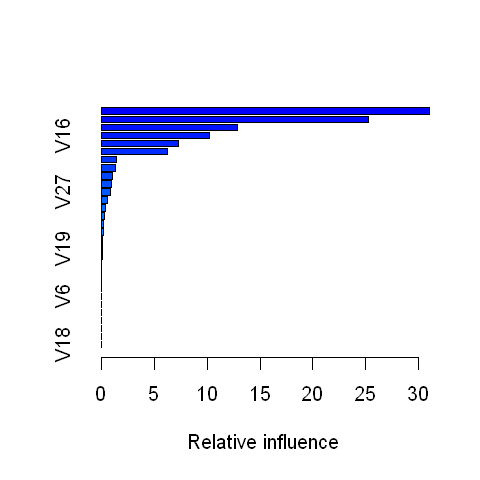

In [40]:
set.seed(123)
gbm_tree<-gbm(V2~.,data = Dataset_1_train,distribution="multinomial")
summary(gbm_tree)
set.seed(123)

In [41]:
p1<-as.data.frame(predict(gbm_tree,Dataset_1_test, type = "response",n.trees = 100))
predictions<-as.data.frame(matrix(nrow = nrow(Dataset_1_test),ncol = 1))
for (i in 1:nrow(predictions)){
  if (p1[i,1]>p1[i,2]) {predictions[i,1]="B"
  }
  else {predictions[i,1]="M"
  }
}
tab<-table(predictions[,1],Dataset_1_test[,1])
test_error<-1-sum(diag(tab)/sum(tab))
print(c("test error:",test_error))

[1] "test error:"        "0.0549999999999999"


- Test error rates for the best model of each approach are given below:

| Penalized Regression | Decision Tree | Random Forest | Stochastic Gradient Boosting |
| --- | --- | --- | --- |
| 0.0349999 | 0.095 | 0.059999 | 0.054999 |


- According to these values, we can say that **penalized regression model** performs better compared to other models.